In [11]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical

np.random.seed(7)
#載入資料集
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()


In [12]:
print(X_train.shape)

(60000, 28, 28)


In [13]:
#將圖片轉成 4D 張量
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype("float32")
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype("float32")
print(X_train.shape)

(60000, 28, 28, 1)


In [14]:
# 因為是固定範圍，所以執行正規化，從0~255到0~1
X_train=X_train/255
X_test=X_test/255
# One-hot編碼
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)
print(Y_train[0],Y_test[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout

# 定義模型
model=Sequential()

# 定義第1組的卷積和池化層
model.add(Conv2D(16, kernel_size=(5,5),padding="same",
                input_shape=(28,28,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# 定義第2組的卷積和池化層
model.add(Conv2D(32, kernel_size=(5,5),padding="same",
                input_shape=(28,28,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# 定義Dropout、平坦層和全連接層
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))
model.summary() # 顯示模型摘要資訊


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [16]:
#編譯模型
model.compile(loss="categorical_crossentropy",optimizer="adam",
             metrics=["accuracy"])
#訓練模型
history=model.fit(X_train,Y_train,validation_split=0.2,
                 epochs=10,batch_size=128,verbose=2)
# epochs=10==>訓練資料10次
# batch_size=128==>一次抓128筆資料去做運算跟誤差修正，設太大訓練會不夠
# verbose=2==>為每個epochs輸出一行紀錄
# verbose=1==>顯示進度條
# verbose=0==>在控制台沒有任何輸出
# verbase=False==>不顯示訊息
#評估模型
print("\nTesting...")
loss,accuracy=model.evaluate(X_train,Y_train)
print("訓練資料集的準確度={:.2f}".format(accuracy))
loss,accuracy=model.evaluate(X_test,Y_test)
print("測試資料集的準確度={:.2f}".format(accuracy))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 35s - loss: 0.3893 - accuracy: 0.8779 - val_loss: 0.0774 - val_accuracy: 0.9767
Epoch 2/10
 - 33s - loss: 0.1229 - accuracy: 0.9630 - val_loss: 0.0521 - val_accuracy: 0.9839
Epoch 3/10
 - 33s - loss: 0.0933 - accuracy: 0.9721 - val_loss: 0.0468 - val_accuracy: 0.9856
Epoch 4/10
 - 34s - loss: 0.0800 - accuracy: 0.9762 - val_loss: 0.0425 - val_accuracy: 0.9883
Epoch 5/10
 - 41s - loss: 0.0706 - accuracy: 0.9790 - val_loss: 0.0370 - val_accuracy: 0.9889
Epoch 6/10
 - 36s - loss: 0.0644 - accuracy: 0.9798 - val_loss: 0.0338 - val_accuracy: 0.9893
Epoch 7/10
 - 34s - loss: 0.0586 - accuracy: 0.9820 - val_loss: 0.0324 - val_accuracy: 0.9903
Epoch 8/10
 - 41s - loss: 0.0535 - accuracy: 0.9833 - val_loss: 0.0311 - val_accuracy: 0.9912
Epoch 9/10
 - 36s - loss: 0.0506 - accuracy: 0.9840 - val_loss: 0.0317 - val_accuracy: 0.9908
Epoch 10/10
 - 37s - loss: 0.0483 - accuracy: 0.9847 - val_loss: 0.0351 - val_accuracy: 0.9901

Testing.

In [17]:
# 儲存keras模型
print("Saving Model: mnist.h5...")
model.save("./data/mnist.h5")

Saving Model: mnist.h5...


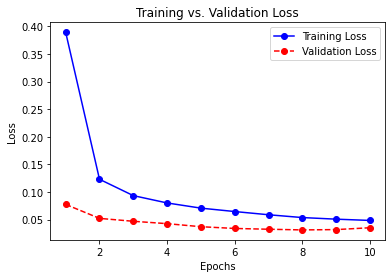

In [18]:
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss=history.history["loss"]
epochs=range(1,len(loss)+1)
val_loss=history.history["val_loss"]
plt.plot(epochs,loss,"bo-",label="Training Loss")
plt.plot(epochs,val_loss,"ro--",label="Validation Loss")
plt.title("Training vs. Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

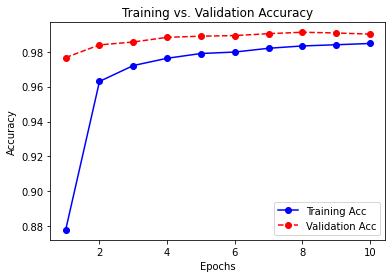

In [19]:
# 顯示訓練和驗證準確度
import matplotlib.pyplot as plt
acc=history.history["accuracy"]
epochs=range(1,len(acc)+1)
val_acc=history.history["val_accuracy"]
plt.plot(epochs,acc,"bo-",label="Training Acc")
plt.plot(epochs,val_acc,"ro--",label="Validation Acc")
plt.title("Training vs. Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [2]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.models import load_model

seed=7
np.random.seed(seed)
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype("float32")
X_test=X_test/255
# One-hot編碼
Y_test_bk=Y_test.copy() # 備份Y_test資料集
Y_test=to_categorical(Y_test)

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
model=Sequential()
model=load_model("./data/mnist.h5")
#編譯模型
model.compile(loss="categorical_crossentropy",optimizer="adam",
             metrics=["accuracy"])
#評估模型
print("Testing...")
loss,accuracy=model.evaluate(X_test,Y_test)
print("測試資料集的準確度={:.2f}".format(accuracy))
# 計算分類的預測值
print("\nPredicting...")
Y_pred=model.predict_classes(X_test)
# 顯示混淆矩陣
tb=pd.crosstab(Y_test_bk.astype(int),Y_pred.astype(int),
              rownames=["label"],colnames=["predict"])
print(tb)

Testing...
10000/10000 [==============================] - 1s 122us/step
測試資料集的準確度=0.99

Predicting...
predict    0     1     2     3    4    5    6     7    8    9
label                                                        
0        977     0     0     0    0    0    1     1    1    0
1          0  1133     1     1    0    0    0     0    0    0
2          1     0  1030     0    0    0    0     1    0    0
3          0     0     1  1004    0    2    0     2    1    0
4          0     0     0     0  981    0    0     0    0    1
5          1     0     0     3    0  883    2     1    0    2
6          6     2     0     0    1    0  948     0    1    0
7          0     2     6     0    0    0    0  1018    1    1
8          2     1     1     1    0    2    0     2  964    1
9          1     4     2     0    9    3    0     7    0  983


In [7]:
from keras.datasets import cifar10
(X_train,Y_train),(X_test,Y_test)=cifar10.load_data()
#形狀
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

170500096/170498071 [==============================] - 21s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


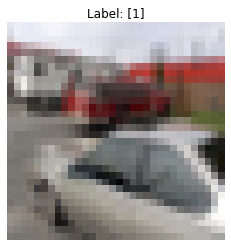

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(X_train[49999],cmap="binary")
plt.title("Label: "+str(Y_train[49999]))
plt.axis("off")
plt.show()

In [7]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.utils import to_categorical

seed=10
np.random.seed(seed)

(X_train,Y_train),(X_test,Y_test)=cifar10.load_data()

X_train=X_train.astype("float32")/255
X_test=X_test.astype("float32")/255
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)

print(X_train.shape)

(50000, 32, 32, 3)


In [8]:
model=Sequential()

# 定義第1組的卷積和池化層
model.add(Conv2D(32, kernel_size=(3,3),padding="same",
                input_shape=X_train.shape[1:],activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3,3),padding="same",
                activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [9]:
model.compile(loss="categorical_crossentropy",optimizer="adam",
             metrics=["accuracy"])
#訓練模型
history=model.fit(X_train,Y_train,validation_split=0.2,
                 epochs=5,batch_size=128,verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
 - 44s - loss: 1.6857 - accuracy: 0.3829 - val_loss: 1.3433 - val_accuracy: 0.5237
Epoch 2/5
 - 52s - loss: 1.3061 - accuracy: 0.5326 - val_loss: 1.1441 - val_accuracy: 0.6077
Epoch 3/5
 - 43s - loss: 1.1625 - accuracy: 0.5854 - val_loss: 1.0402 - val_accuracy: 0.6428
Epoch 4/5
 - 41s - loss: 1.0774 - accuracy: 0.6200 - val_loss: 0.9831 - val_accuracy: 0.6643
Epoch 5/5
 - 41s - loss: 0.9984 - accuracy: 0.6459 - val_loss: 0.9673 - val_accuracy: 0.6659


In [16]:
print("Saving Model: cifar10.h5...")
model.save("./data/cifar10.h5")

Saving Model: cifar10.h5...


In [10]:
loss,accuracy=model.evaluate(X_test,Y_test)
print("測試資料集的準確度={:.2f}".format(accuracy))

10000/10000 [==============================] - 2s 219us/step
測試資料集的準確度=0.66


In [18]:
# 測試資料集的分類和機率的預測值
print("Predicting...")
Y_pred=model.predict_classes(X_test) # 分類
Y_probs=model.predict_proba(X_test) # 機率
print(len(Y_pred))
print(len(Y_probs))

Predicting...
10000
10000


In [20]:
print(len(Y_test))

100000


In [29]:
# 建立分類錯誤的 DataFrame 物件
Y_test=Y_test.flatten()
df=pd.DataFrame({"label":Y_test,"predict":Y_pred})
df=df[Y_test!=Y_pred] # 篩選出分類錯誤的資料
print(df.head())

    label  predict
6       1        3
15      8        6
17      7        3
21      0        2
22      4        0


In [30]:
# 隨機選1個錯誤分類的數字索引
i=df.sample(n=1).index.values.astype(int)[0]
print("Tndex:",i)
img=X_test[i]

Tndex: 4476


(-0.5, 31.5, 31.5, -0.5)

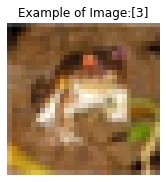

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
(_,_),(_,Y_test)=cifar10.load_data()
# 繪出圖表的預測結果
plt.figure()
plt.subplot(1,2,1)
plt.title("Example of Image:"+str(Y_test[0]))
plt.imshow(X_train[0],cmap="binary")
plt.axis("off")

Predicting...


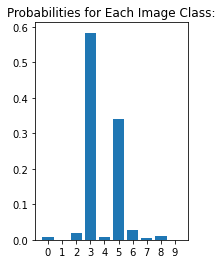

In [34]:
# 預測結果的機率
print("Predicting...")
probs=model.predict_proba(X_test)
plt.subplot(1,2,2)
plt.title("Probabilities for Each Image Class:")
plt.bar(np.arange(10),probs[0].reshape(10),align="center")
plt.xticks(np.arange(10),np.arange(10).astype(str))
plt.show()